In [12]:
import pandas as pd

df = pd.read_csv("data/imdb_top_1000.csv")
df.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [13]:
df = df[["Overview", "Series_Title", "Genre"]]

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

label_column = "Genre"

# we filter and take only the first genre for simplicity
df[label_column] = df[label_column].apply(lambda x: x.split(",")[0])

# also, we filter the data to only include the top 5 genres
top_genres = df[label_column].value_counts().nlargest(5).index
df = df[df[label_column].isin(top_genres)]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df["Overview"],
    df[label_column],
    test_size=0.2,
    random_state=42,
    stratify=df[label_column],
)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

model = LinearSVC()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.44      0.40      0.42        35
           1       0.38      0.28      0.32        18
           2       0.33      0.26      0.29        31
           3       0.39      0.33      0.36        21
           4       0.42      0.55      0.48        58

    accuracy                           0.40       163
   macro avg       0.39      0.36      0.37       163
weighted avg       0.40      0.40      0.40       163

[[0.4        0.05714286 0.11428571 0.05714286 0.37142857]
 [0.16666667 0.27777778 0.         0.05555556 0.5       ]
 [0.06451613 0.03225806 0.25806452 0.16129032 0.48387097]
 [0.19047619 0.         0.14285714 0.33333333 0.33333333]
 [0.15517241 0.0862069  0.15517241 0.05172414 0.55172414]]


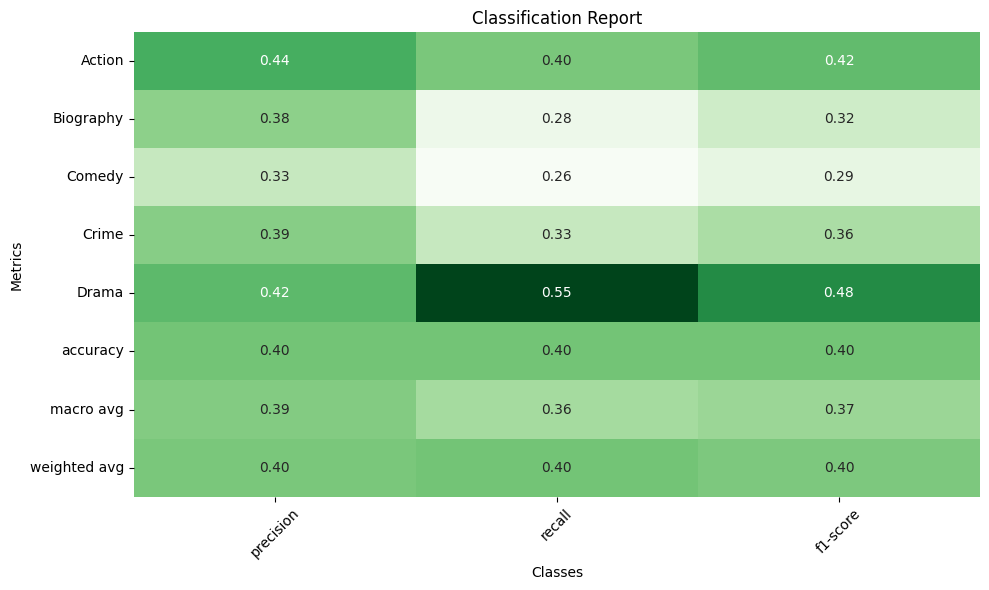

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

cr = classification_report(y_test, y_pred, zero_division=0, target_names=le.classes_, output_dict=True)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(
	pd.DataFrame(cr).iloc[:-1, :].T,
	annot=True,
	fmt=".2f",
	cmap="Greens",
	cbar=False,
	ax=ax,
)
ax.set_title("Classification Report")
ax.set_xlabel("Classes")
ax.set_ylabel("Metrics")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<Axes: >

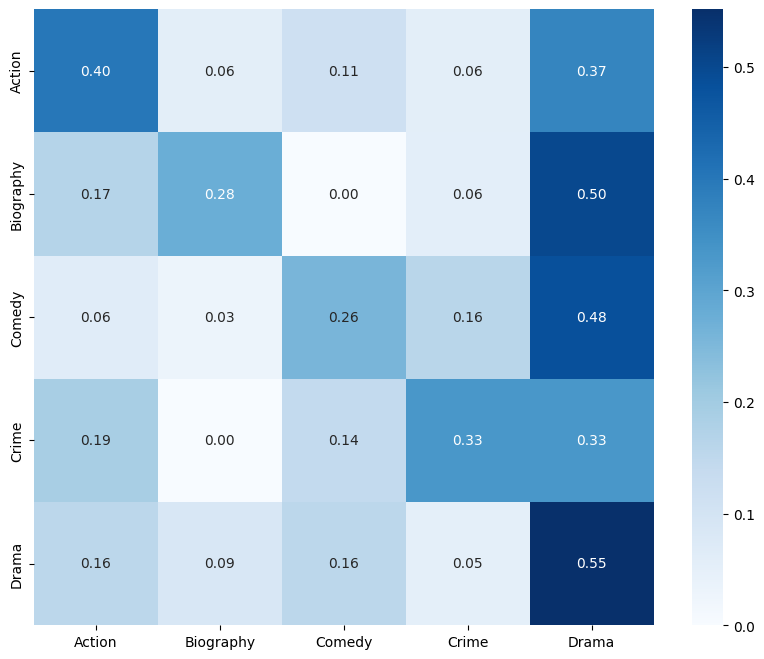

In [27]:

import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred, labels=range(len(le.classes_)), normalize="true")

# draw confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
	cm,
	annot=True,
	fmt=".2f",
	cmap="Blues",
	xticklabels=le.classes_,
	yticklabels=le.classes_,
)


## Train a feedforward network using glove embeddings

In [ ]:
#TODO